このコードは、Google Colab 上で Google ドライブに保存されている CSV ファイルを読み込むためのものです。順番に解説していきます。

---

### **1. Google ドライブをマウント**
```python
from google.colab import drive
drive.mount('/content/drive')
```
- `from google.colab import drive`: Google Colab 環境で Google ドライブを操作するためのライブラリ `drive` をインポート。
- `drive.mount('/content/drive')`: Google ドライブを仮想的に `/content/drive` にマウント（接続）する。
  - 実行すると、認証用のリンクが表示され、ユーザーが Google アカウントを認証することでドライブの内容にアクセス可能になる。

---

### **2. データの保存ディレクトリを指定**
```python
directory = '/content/drive/My Drive/day6'
```
- Google ドライブ内の特定のフォルダ `day6` を指定して、そこに保存されているファイルにアクセスできるようにする。

---

### **3. CSV ファイルの読み込み**
```python
import pandas as pd
import os

descriptor_df = pd.read_csv(os.path.join(directory, 'descriptor_df.csv'))
property_df = pd.read_csv(os.path.join(directory, 'property_df.csv'))
```
- `pandas` を用いて CSV ファイルをデータフレームとして読み込む。
- `os.path.join(directory, 'descriptor_df.csv')` で `day6` フォルダ内の `descriptor_df.csv` のフルパスを取得。
- `pd.read_csv()` で CSV ファイルを読み込んで、`descriptor_df` および `property_df` にデータを格納。

---

### **用途と想定されるデータ**
- `descriptor_df.csv`: 化学的な特徴量（descriptors）を含むデータ。
- `property_df.csv`: 化合物の特性（property）を記録したデータ。

このコードは、化学データを機械学習モデルに適用する際の前処理として、Google ドライブに保存された CSV を Colab に取り込むために使用される可能性が高いです。

In [ ]:
from google.colab import drive
import pandas as pd
import os

# Google ドライブをマウント
drive.mount('/content/drive')

# ディレクトリのパス
directory = '/content/drive/My Drive/day6'

# CSVファイルからデータフレームを読み込み
descriptor_df = pd.read_csv(os.path.join(directory, 'descriptor_df.csv'))
property_df = pd.read_csv(os.path.join(directory, 'property_df.csv'))

Mounted at /content/drive


このコードは、PyTorch の `Dataset` クラスを継承してカスタムデータセット `MoleculeDataset` を定義するものです。化学データ（分子の記述子）を PyTorch のデータローダー `DataLoader` で扱いやすい形に変換するために使用されます。順番に解説していきます。

---

## **1. 必要なモジュールのインポート**
```python
from torch.utils.data import DataLoader, Dataset
```
- `Dataset`: PyTorch のデータセットを作成するためのクラス。
- `DataLoader`: データセットをミニバッチ単位で取得し、シャッフルや並列処理を行うクラス。

---

## **2. カスタムデータセット `MoleculeDataset` の定義**
```python
class MoleculeDataset(Dataset):
```
- PyTorch の `Dataset` を継承して、カスタムデータセットクラス `MoleculeDataset` を作成。
- 分子の記述子データと物性データを PyTorch のテンソルとして扱えるようにする。

---

## **3. `__init__` メソッド（データセットの初期化）**
```python
def __init__(self, df, property):
    self.descriptors = torch.tensor(df.values, dtype=torch.float32)
    self.properties = torch.tensor(property.values, dtype=torch.float32)
```
- `df`: 分子の記述子（descriptors）を含むデータフレーム。
- `property`: 分子の物性値（target）を含むデータフレーム。
- `torch.tensor(df.values, dtype=torch.float32)`: `df` の値を `float32` 型の PyTorch テンソルに変換。
- `torch.tensor(property.values, dtype=torch.float32)`: `property` の値を `float32` 型の PyTorch テンソルに変換。

これにより、データフレームを PyTorch のニューラルネットワークで処理できる形式に変換。

**例:**
```python
import pandas as pd

df = pd.DataFrame([[1.2, 3.4], [5.6, 7.8]], columns=["desc1", "desc2"])
property = pd.DataFrame([1, 0], columns=["target"])

dataset = MoleculeDataset(df, property)
```

---

## **4. `__len__` メソッド（データセットの長さを取得）**
```python
def __len__(self):
    return len(self.descriptors)
```
- `len(dataset)` のようにデータセットの長さを取得する際に呼び出される。
- 記述子の数（データセットのサンプル数）を返す。

**例:**
```python
len(dataset)  # 2
```

---

## **5. `__getitem__` メソッド（インデックス指定でデータを取得）**
```python
def __getitem__(self, idx):
    return self.descriptors[idx], self.properties[idx]
```
- `dataset[idx]` のようにインデックスを指定すると、該当する `descriptors` と `properties` のペアを返す。
- ニューラルネットワークの学習時に、特徴量（X）とラベル（y）を取得するために使用。

**例:**
```python
x, y = dataset[0]
print(x)  # tensor([1.2000, 3.4000])
print(y)  # tensor([1.])
```

---

## **6. `DataLoader` との組み合わせ**
データセットを `DataLoader` に渡すことで、バッチ処理やシャッフルが可能になる。
```python
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

for batch in dataloader:
    x_batch, y_batch = batch
    print(x_batch)
    print(y_batch)
```
- `batch_size=2`: 1 バッチのデータ数。
- `shuffle=True`: データの順序をランダム化。

---

## **まとめ**
- `MoleculeDataset` は、化学データ（分子の記述子と物性）を PyTorch の `Dataset` として扱うためのクラス。
- データフレームから PyTorch のテンソルに変換して、`DataLoader` でバッチ学習が可能になる。
- `__getitem__` で個々のデータを取得でき、`__len__` でデータセットのサイズを取得できる。

このコードは、化学データを用いた機械学習（特に PyTorch を使った深層学習）でよく使われる形になっています。

In [ ]:
from torch.utils.data import DataLoader, Dataset

class MoleculeDataset(Dataset):
    def __init__(self, df, property):
        self.descriptors = torch.tensor(df.values, dtype=torch.float32)
        self.properties = torch.tensor(property.values, dtype=torch.float32)

    def __len__(self):
        return len(self.descriptors)

    def __getitem__(self, idx):
        return self.descriptors[idx], self.properties[idx]


このコードは、化合物データ (`property_df`) を **ランダムサンプリング・データ分割** するためのものです。順番に解説します。

---

## **1. 必要なモジュールのインポート**
```python
from sklearn.model_selection import train_test_split
```
- `train_test_split`: `scikit-learn` のデータ分割関数で、データセットを **トレーニングデータ** と **検証データ** に分割する際に使われる。

---

## **2. 1000 化合物をランダムに選び出す**
```python
known_subset = property_df.sample(n=1000, random_state=42)
```
- `property_df.sample(n=1000, random_state=42)`: `property_df` から **ランダムに 1000 個のデータをサンプリング** して `known_subset` に格納。
- `random_state=42`: **ランダムシード** を固定することで、再現性のあるサンプリングを行う。

---

## **3. 残りのデータをテストデータとする**
```python
test_data = property_df.drop(known_subset.index)
```
- `.drop(known_subset.index)`: `known_subset` で選ばれなかったデータを `test_data` として取得。
- **ここでのポイント**
  - `property_df` のうち、1000 化合物が `known_subset` へ。
  - 残りの化合物が `test_data` へ（テストデータとして使用）。

---

## **4. 1000 化合物をさらにトレーニングデータと検証データに分割**
```python
train_data, valid_data = train_test_split(known_subset, test_size=0.2, random_state=42)
```
- `train_test_split(known_subset, test_size=0.2, random_state=42)`
  - `known_subset` を **トレーニングデータ (80%)** と **検証データ (20%)** に分割。
  - `test_size=0.2`: `20%` を検証データにする（1000 × 0.2 = 200 化合物）。
  - `random_state=42`: 乱数シードを固定して、毎回同じ分割結果になるようにする。

---

## **データ分割の結果**
- **1000 化合物**
  - **トレーニングデータ (`train_data`)**: **800 化合物**
  - **検証データ (`valid_data`)**: **200 化合物**
- **残りのデータ**
  - **テストデータ (`test_data`)**: `property_df` のうち **1000 化合物を除いたデータ**

---

## **このコードの目的**
このコードは **化合物データを機械学習モデルの学習用に適切に分割** することを目的としています。
- **トレーニングデータ (`train_data`)** → モデルを学習させる。
- **検証データ (`valid_data`)** → ハイパーパラメータの調整や過学習の確認に使用。
- **テストデータ (`test_data`)** → モデルの最終的な評価に使用。

---

## **まとめ**
1. `property_df` からランダムに 1000 化合物をサンプリング (`known_subset`)。
2. 残りの化合物をテストデータ (`test_data`) にする。
3. 1000 化合物を **80%:20%** に分割（トレーニング・検証データ）。

このデータ分割は **機械学習モデルの性能評価を適切に行う** ための基本的な手順としてよく使われます。

In [ ]:
from sklearn.model_selection import train_test_split

# 1000 化合物をランダムに選び出す
known_subset = property_df.sample(n=1000, random_state=42)

# 余った化合物をテストデータとする
test_data = property_df.drop(known_subset.index)

# 選び出した1000化合物をトレーニングデータと検証データにさらに分割
train_data, valid_data = train_test_split(known_subset, test_size=0.2, random_state=42)

このコードは、**PyTorch を用いた回帰モデル（Regressor）を定義** しています。化合物の記述子（descriptors）を入力とし、最終的に 1 つの連続値（物性値など）を出力する **多層ニューラルネットワーク（MLP）** です。順番に解説していきます。

---

## **1. 必要なモジュールのインポート**
```python
from torch import nn
```
- `torch.nn` は **ニューラルネットワークの構築に必要なモジュール** で、層（`Linear`）や活性化関数（`ReLU`）などが含まれる。

---

## **2. モデルの定義**
```python
class Regressor(nn.Module):
```
- `Regressor` クラスは `nn.Module` を継承して作られる PyTorch のニューラルネットワークモデル。

---

## **3. `__init__` メソッド（ネットワーク構造の定義）**
```python
def __init__(self):
    super(Regressor, self).__init__()
    self.fc1 = nn.Linear(descriptor_df.shape[1], 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 128)
    self.fc4 = nn.Linear(128, 1)
```
- `super(Regressor, self).__init__()`  
  - `nn.Module` の `__init__` メソッドを呼び出し、モデルの基本機能を継承。
- `self.fc1 = nn.Linear(descriptor_df.shape[1], 512)`  
  - **入力層**（`descriptor_df.shape[1]` 個の特徴量 → 512 ユニット）。
  - `descriptor_df.shape[1]` は **記述子の数（特徴量の次元数）**。
- `self.fc2 = nn.Linear(512, 256)`  
  - **隠れ層1**（512 → 256）。
- `self.fc3 = nn.Linear(256, 128)`  
  - **隠れ層2**（256 → 128）。
- `self.fc4 = nn.Linear(128, 1)`  
  - **出力層**（128 → 1）。  
  - 物性値などの **回帰タスク** を想定しているため、最終出力は 1 つの数値。

---

## **4. `forward` メソッド（順伝播）**
```python
def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x
```
- `forward(x)` は **入力データ `x` を受け取り、出力を返す関数**。
- 各層の処理：
  1. `self.fc1(x)`: **入力層 → 隠れ層 512**
  2. `F.relu(self.fc1(x))`: **ReLU 活性化関数** を適用。
  3. `self.fc2(x)`: **512 → 256**
  4. `F.relu(self.fc2(x))`: **ReLU**
  5. `self.fc3(x)`: **256 → 128**
  6. `F.relu(self.fc3(x))`: **ReLU**
  7. `self.fc4(x)`: **128 → 1（最終出力）**
  8. `return x`: **最終的な数値を出力（回帰値）**

---

## **5. モデルの特性**
- **入力:** `descriptor_df.shape[1]` 個の特徴量（分子記述子）。
- **出力:** 1 つの連続値（物性値）。
- **層構造:** 4 つの全結合層（512 → 256 → 128 → 1）。
- **活性化関数:** ReLU（最終層はなし → そのまま出力）。
- **用途:** 化合物の物性値を予測する **回帰モデル**。

---

## **6. 使用例**
```python
import torch

# モデルのインスタンス化
model = Regressor()

# ダミーの入力データ（特徴量の次元数に合わせる）
dummy_input = torch.randn(10, descriptor_df.shape[1])  # 10個のサンプル

# 順伝播（予測）
output = model(dummy_input)
print(output.shape)  # torch.Size([10, 1])
```
- `torch.randn(10, descriptor_df.shape[1])` で **ランダムな 10 個のサンプルを生成** し、モデルに入力。
- `output.shape` が `(10, 1)` となり、10 個の予測値が出力される。

---

## **7. 追加の改善点**
1. **活性化関数のインポート修正**
   ```python
   import torch.nn.functional as F  # 明示的にFをインポート
   ```
2. **出力層の活性化関数**
   - **回帰問題** では通常、最終層に **活性化関数を適用しない** が、例えば **非負値のみを出力したい場合** には `F.relu(self.fc4(x))` などを適用できる。

---

## **まとめ**
- PyTorch の `nn.Module` を継承して **回帰モデル（MLP）** を定義。
- **入力層 → 隠れ層3つ（ReLU活性化） → 出力層** の構造。
- **特徴量（descriptors）を入力** し、**連続値（物性値）を出力**。
- **機械学習による化合物の物性予測に適用可能**。

このような MLP は、化学データの回帰タスク（溶解度予測、薬物活性予測など）で広く使われています。

In [ ]:
from torch import nn

# Modelの定義
class Regressor(nn.Module):
    def __init__(self):
        super(Regressor, self).__init__()
        self.fc1 = nn.Linear(descriptor_df.shape[1], 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

このコードは、**PyTorch を用いた Dipole moment（双極子モーメント）の回帰モデルの学習** を行うものです。以下の手順で進められています。

---

## **1. 必要なモジュールのインポート**
```python
import torch
from torch.nn import functional as F
from torch.optim import Adam
import matplotlib.pyplot as plt
```
- `torch`: PyTorch の基本モジュール。
- `F`: `torch.nn.functional`（活性化関数など）。
- `Adam`: **Adam オプティマイザ**（学習の最適化に使用）。
- `matplotlib.pyplot`: **損失の可視化** に使用。

---

## **2. モデル・オプティマイザ・損失関数の定義**
```python
model_dipole = Regressor()
optimizer_dipole = Adam(model_dipole.parameters(), lr=0.001)
criterion_dipole = nn.MSELoss()
```
- **`Regressor()` のインスタンス化**
  - これは **事前に定義された MLP（多層ニューラルネットワーク）** を呼び出している。
  - 化合物の記述子（descriptors）を入力し、Dipole moment を予測する。
- **オプティマイザ（`Adam`）**
  - **学習率 `lr=0.001`** で Adam 最適化アルゴリズムを使用。
- **損失関数（`MSELoss`）**
  - 回帰タスクなので **平均二乗誤差（MSE）** を損失関数として使用。

---

## **3. データセットと DataLoader の定義**
```python
trainval_data_dipole = MoleculeDataset(descriptor_df, property_df['Dipole moment'])
trainval_loader_dipole = DataLoader(dataset=trainval_data_dipole, batch_size=32, shuffle=True)
```
- `MoleculeDataset(descriptor_df, property_df['Dipole moment'])`
  - **分子記述子（`descriptor_df`）** と **Dipole moment（`property_df['Dipole moment']`）** のペアを作成。
- `DataLoader(...)`
  - **バッチサイズ 32** でデータをロードし、**シャッフルあり**（ランダム化して学習）。

---

## **4. 学習ループ**
```python
train_losses_dipole = []
for epoch in range(100):
    model_dipole.train()
    running_loss = 0
```
- **学習の繰り返し (`epoch = 100`)**
  - **100 エポック**（100回データを繰り返し学習）。
- **`model_dipole.train()`**
  - モデルを **学習モード** に設定。

---

## **5. バッチ学習**
```python
for batch in trainval_loader_dipole:
    descriptor, property = batch
```
- **`DataLoader` からバッチ単位でデータを取り出す**
  - `descriptor`: **入力データ（記述子）**
  - `property`: **ターゲット（Dipole moment）**

```python
optimizer_dipole.zero_grad()
outputs = model_dipole(descriptor)
loss = criterion_dipole(outputs[:,0], property)
running_loss += loss.item()
```
- **`zero_grad()`**
  - **勾配をリセット**（前の勾配が残らないように）。
- **順伝播 (`forward`)**
  - `outputs = model_dipole(descriptor)` で予測値を取得。
- **損失計算**
  - `MSELoss(outputs[:,0], property)` で **実際の Dipole moment との誤差** を求める。

```python
loss.backward()
optimizer_dipole.step()
```
- **誤差逆伝播 (`backward()`)**
  - **勾配を計算し、モデルのパラメータを更新**。
- **オプティマイザのステップ (`step()`)**
  - **学習の更新** を行う。

```python
running_loss /= len(trainval_loader_dipole)
train_losses_dipole.append(running_loss)
```
- `running_loss` を **バッチ数で割って平均化**。
- 各エポックごとの損失をリスト `train_losses_dipole` に追加。

---

## **6. 学習曲線のプロット**
```python
plt.plot(train_losses_dipole)
plt.show()
```
- **学習損失の可視化**
  - 損失が収束（減少）しているかを確認するためのグラフを描画。

---

## **まとめ**
1. **MLP を用いた Dipole moment の回帰モデルを構築**
2. **全データを使って学習**
3. **バッチサイズ 32 のミニバッチ勾配降下法を適用**
4. **MSE を損失関数として 100 エポック学習**
5. **学習損失をプロットして収束を確認**

このコードは、**化学的なデータを用いた機械学習モデルの学習プロセス** を示しており、他の物性（溶解度、密度など）にも応用可能です。

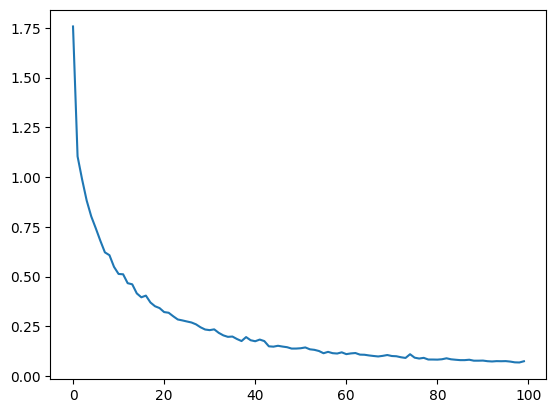

In [ ]:
import torch
from torch.nn import functional as F
from torch.optim import Adam
import matplotlib.pyplot as plt

# モデルのパラメータの一部をもとに、Dipole momentの回帰モデルを構築予定。まず、全てのデータについてのDipole moment回帰モデルから学習を行う。
model_dipole = Regressor()
optimizer_dipole = Adam(model_dipole.parameters(), lr=0.001)
criterion_dipole = nn.MSELoss()

# 全データを用いるため、DataLoaderを再定義
trainval_data_dipole = MoleculeDataset(descriptor_df, property_df['Dipole moment'])
trainval_loader_dipole = DataLoader(dataset=trainval_data_dipole, batch_size=32, shuffle=True)

train_losses_dipole = []
for epoch in range(100):
    model_dipole.train()
    running_loss = 0
    for batch in trainval_loader_dipole:
        descriptor, property = batch
        optimizer_dipole.zero_grad()
        outputs = model_dipole(descriptor)
        loss = criterion_dipole(outputs[:,0], property)
        running_loss += loss.item()
        loss.backward()
        optimizer_dipole.step()
    running_loss /= len(trainval_loader_dipole)
    train_losses_dipole.append(running_loss)

plt.plot(train_losses_dipole)
plt.show()

このコードは、**HOMO-LUMO gap（分子の電子構造に関する物理化学的特性）の回帰モデル** を構築し、**トレーニング・検証・テストの評価を行う** ものです。  

---

## **1. モデルの準備**
```python
import copy
from sklearn.metrics import r2_score
```
- **`copy.deepcopy()`**
  - 以前学習した `model_dipole` をコピーし、新しいモデル `model_gap` を作成（パラメータを共有せず独立した学習が可能）。
- **`r2_score`**
  - **決定係数 \( R^2 \) を計算** し、モデルの予測精度を評価する。

```python
model_gap = copy.deepcopy(model_dipole)
optimizer_gap = Adam(model_gap.parameters(), lr=0.001)
criterion_gap = nn.MSELoss()
```
- `model_gap` を `model_dipole` からコピーし、新たに **HOMO-LUMO gap の予測** に使用。
- **学習率 \( 0.001 \) で Adam 最適化**。
- **損失関数は MSE（平均二乗誤差）**（回帰タスク）。

---

## **2. データセットと DataLoader の準備**
```python
train_data_gap = MoleculeDataset(descriptor_df.loc[train_data.index, :], train_data['HOMO-LUMO gap'])
valid_data_gap = MoleculeDataset(descriptor_df.loc[valid_data.index, :], valid_data['HOMO-LUMO gap'])
train_loader_gap = DataLoader(dataset=train_data_gap, batch_size=32, shuffle=True)
valid_loader_gap = DataLoader(dataset=valid_data_gap, batch_size=32)
```
- **データセットの作成**
  - 記述子 (`descriptor_df`) とターゲット (`HOMO-LUMO gap`) を取得。
  - `train_data`、`valid_data` からそれぞれデータを抽出。
- **データローダー**
  - バッチサイズ 32 で学習データをシャッフルしてロード。
  - 検証データはシャッフルせずロード。

---

## **3. 学習ループ**
```python
train_losses_gap = []
valid_losses_gap = []
for epoch in range(100):
    model_gap.train()
    running_loss = 0
```
- **100エポック学習**（データを100回繰り返して学習）。
- `model_gap.train()` で **学習モード** に設定。

### **3.1. 訓練データでの学習**
```python
for batch in train_loader_gap:
    descriptor, property = batch
    optimizer_gap.zero_grad()
    outputs = model_gap(descriptor)
    loss = criterion_gap(outputs[:,0], property)
    running_loss += loss.item()
    loss.backward()
    optimizer_gap.step()
```
- 各バッチ（記述子 `descriptor` とターゲット `property`）で学習。
- **順伝播 (`outputs = model_gap(descriptor)`)** → **損失計算 (`MSELoss`)** → **勾配リセット (`zero_grad()`)** → **誤差逆伝播 (`backward()`)** → **パラメータ更新 (`step()`)**。

```python
running_loss /= len(train_loader_gap)
train_losses_gap.append(running_loss)
```
- 各エポックの **平均損失を計算し記録**。

---

### **3.2. 検証データでの評価**
```python
model_gap.eval()
running_loss = 0
for batch in valid_loader_gap:
    descriptor, property = batch
    outputs = model_gap(descriptor)
    loss = criterion_gap(outputs[:,0], property)
    running_loss += loss.item()
running_loss /= len(valid_loader_gap)
valid_losses_gap.append(running_loss)
```
- `model_gap.eval()` で **評価モード** に設定（ドロップアウトなどの影響を無効化）。
- 検証データに対して順伝播し、損失を計算。
- **パラメータの更新は行わない**（`zero_grad()` や `backward()` は不要）。

---

## **4. 学習・検証損失のプロット**
```python
plt.plot(train_losses_gap, label='Training loss')
plt.plot(valid_losses_gap, label='Validation loss')
plt.legend(frameon=False)
plt.show()
```
- **学習損失と検証損失の推移を可視化**。
- 検証損失が増加し始めたら、過学習の兆候。

---

## **5. モデルの評価**
```python
y_train_true = train_data['HOMO-LUMO gap'].values
y_valid_true = valid_data['HOMO-LUMO gap'].values
y_test_true = test_data['HOMO-LUMO gap'].values
```
- **真の HOMO-LUMO gap の値** を取得。

```python
y_train_pred = model_gap(torch.Tensor(descriptor_df.loc[train_data.index].values)).detach().numpy()[:,0]
y_valid_pred = model_gap(torch.Tensor(descriptor_df.loc[valid_data.index].values)).detach().numpy()[:,0]
y_test_pred = model_gap(torch.Tensor(descriptor_df.loc[test_data.index].values)).detach().numpy()[:,0]
```
- 訓練・検証・テストデータの **予測値を取得**（`detach()` で計算グラフを切り離し `numpy()` に変換）。

```python
print("Train R^2 Score:", r2_score(y_train_true, y_train_pred))
print("Valid R^2 Score:", r2_score(y_valid_true, y_valid_pred))
print("Test R^2 Score:", r2_score(y_test_true, y_test_pred))
```
- **決定係数 \( R^2 \) を計算**
  - \( R^2 \) 値は **1 に近いほど予測精度が高い**。
  - 訓練データに対して **異常に高く、テストデータで低い** 場合は **過学習** の可能性。

---

## **まとめ**
1. **Dipole moment モデル（`model_dipole`）をコピーして新たな `model_gap` を作成**。
2. **HOMO-LUMO gap の回帰モデルとして学習**。
3. **学習・検証データで MSE を計算し、収束状況を確認**。
4. **学習・検証損失をプロットし、過学習の有無を視覚的に分析**。
5. **決定係数 \( R^2 \) でモデルの予測性能を評価**。

---

このコードは、**化学データを用いた深層学習回帰モデル** の典型的なトレーニング・評価プロセスを示しており、**他の物性（溶解度、密度など）にも応用可能** です。

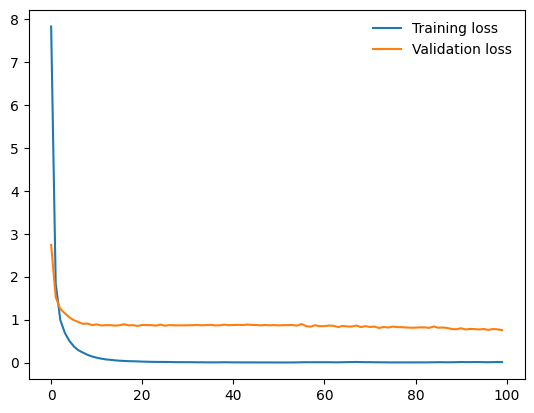

Train R^2 Score: 0.9958446773041935
Valid R^2 Score: 0.6880151860189045
Test R^2 Score: 0.6513012256281678


In [ ]:
import copy
from sklearn.metrics import r2_score

model_gap = copy.deepcopy(model_dipole)
optimizer_gap = Adam(model_gap.parameters(), lr=0.001)
criterion_gap = nn.MSELoss()

train_data_gap = MoleculeDataset(descriptor_df.loc[train_data.index, :], train_data['HOMO-LUMO gap'])
valid_data_gap = MoleculeDataset(descriptor_df.loc[valid_data.index, :], valid_data['HOMO-LUMO gap'])
train_loader_gap = DataLoader(dataset=train_data_gap, batch_size=32, shuffle=True)
valid_loader_gap = DataLoader(dataset=valid_data_gap, batch_size=32)

train_losses_gap = []
valid_losses_gap = []
for epoch in range(100):
    model_gap.train()
    running_loss = 0
    for batch in train_loader_gap:
        descriptor, property = batch
        optimizer_gap.zero_grad()
        outputs = model_gap(descriptor)
        loss = criterion_gap(outputs[:,0], property)
        running_loss += loss.item()
        loss.backward()
        optimizer_gap.step()
    running_loss /= len(train_loader_gap)
    train_losses_gap.append(running_loss)

    model_gap.eval()
    running_loss = 0
    for batch in valid_loader_gap:
        descriptor, property = batch
        outputs = model_gap(descriptor)
        loss = criterion_gap(outputs[:,0], property)
        running_loss += loss.item()
    running_loss /= len(valid_loader_gap)
    valid_losses_gap.append(running_loss)

plt.plot(train_losses_gap, label='Training loss')
plt.plot(valid_losses_gap, label='Validation loss')
plt.legend(frameon=False)
plt.show()

y_train_true = train_data['HOMO-LUMO gap'].values
y_valid_true = valid_data['HOMO-LUMO gap'].values
y_test_true = test_data['HOMO-LUMO gap'].values

y_train_pred = model_gap(torch.Tensor(descriptor_df.loc[train_data.index].values)).detach().numpy()[:,0]
y_valid_pred = model_gap(torch.Tensor(descriptor_df.loc[valid_data.index].values)).detach().numpy()[:,0]
y_test_pred = model_gap(torch.Tensor(descriptor_df.loc[test_data.index].values)).detach().numpy()[:,0]

print("Train R^2 Score:", r2_score(y_train_true, y_train_pred))
print("Valid R^2 Score:", r2_score(y_valid_true, y_valid_pred))
print("Test R^2 Score:", r2_score(y_test_true, y_test_pred))

このコードは、**HOMO-LUMO gap（分子の電子構造の重要な指標）を予測する回帰モデル** を構築し、**転移学習（Transfer Learning）** を活用して学習を行うものです。  

通常のニューラルネットワーク学習との違いは、**既存の Dipole moment 回帰モデル (`model_dipole`) を再利用し、一部の層の学習を固定して新しいタスクに適用** している点です。

---

## **1. モデルの準備**
```python
import copy
from sklearn.metrics import r2_score

# モデルの複製
model_gap = copy.deepcopy(model_dipole)
```
- `copy.deepcopy(model_dipole)` により、**Dipole moment 予測モデル (`model_dipole`) をそのままコピー**。
- これにより、`model_gap` は `model_dipole` と同じアーキテクチャ・パラメータを持つが、**新たに学習を行う独立したモデル** となる。

---

## **2. 転移学習の設定**
```python
# 最初の層の重みを固定（学習させない）
for param in list(model_gap.parameters())[:-1]:
    param.requires_grad = False
```
- **最終層以外の重み（パラメータ）を固定** し、学習対象から除外。
- `model.parameters()` で取得できるリストのうち、**最後の層以外 (`[:-1]`)** の `requires_grad` を `False` に設定。
- これにより、**既存の層はそのまま利用し、新しいタスクの学習では最終層のみ更新** される。

```python
# パラメータ更新対象として、最終層のパラメータだけを optimizer に渡す
optimizer_gap = Adam([list(model_gap.parameters())[-1]], lr=0.001)
```
- 通常 `Adam(model.parameters(), lr=0.001)` と書くが、ここでは **最終層のパラメータのみを更新対象** に指定。
- これにより、**既存の Dipole moment モデルの特徴抽出能力を活かしながら、新しいタスク（HOMO-LUMO gap 予測）の学習が可能** になる。

---

## **3. データの準備**
```python
train_data_gap = MoleculeDataset(descriptor_df.loc[train_data.index, :], train_data['HOMO-LUMO gap'])
valid_data_gap = MoleculeDataset(descriptor_df.loc[valid_data.index, :], valid_data['HOMO-LUMO gap'])
train_loader_gap = DataLoader(dataset=train_data_gap, batch_size=32, shuffle=True)
valid_loader_gap = DataLoader(dataset=valid_data_gap, batch_size=32)
```
- `train_data` と `valid_data` から **記述子（`descriptor_df`）とターゲット（`HOMO-LUMO gap`）を取得**。
- PyTorch の `MoleculeDataset` を使い、`DataLoader` でバッチサイズ 32 でデータを読み込む。

---

## **4. 学習ループ**
```python
train_losses_gap = []
valid_losses_gap = []
for epoch in range(1000):
```
- 1000エポック学習（通常より多めのエポック数）。
- **転移学習では固定された層が多いため、通常より長めの学習が必要になる** ことがある。

---

### **4.1. 訓練データでの学習**
```python
model_gap.train()
running_loss = 0
for batch in train_loader_gap:
    descriptor, property = batch
    optimizer_gap.zero_grad()
    outputs = model_gap(descriptor)
    loss = criterion_gap(outputs[:,0], property)
    running_loss += loss.item()
    loss.backward()
    optimizer_gap.step()
running_loss /= len(train_loader_gap)
train_losses_gap.append(running_loss)
```
- **順伝播 (`outputs = model_gap(descriptor)`)**
- **損失計算 (`MSELoss`)**
- **勾配リセット (`zero_grad()`)**
- **誤差逆伝播 (`backward()`)**
- **最適化 (`step()`)**

---

### **4.2. 検証データでの評価**
```python
model_gap.eval()
running_loss = 0
for batch in valid_loader_gap:
    descriptor, property = batch
    outputs = model_gap(descriptor)
    loss = criterion_gap(outputs[:,0], property)
    running_loss += loss.item()
running_loss /= len(valid_loader_gap)
valid_losses_gap.append(running_loss)
```
- `model_gap.eval()` に設定し、**ドロップアウトやバッチ正規化の影響をなくす**。
- 学習時と同様に順伝播し、**検証損失を計算**（勾配計算は不要なので `zero_grad()` や `backward()` は呼ばない）。

---

## **5. 学習曲線の可視化**
```python
plt.plot(train_losses_gap, label='Training loss')
plt.plot(valid_losses_gap, label='Validation loss')
plt.legend(frameon=False)
plt.show()
```
- **学習・検証損失の推移を可視化** し、モデルの収束状況を確認。
- **過学習の兆候（検証損失が上昇し始める）をチェックする**。

---

## **6. モデルの評価**
```python
y_train_true = train_data['HOMO-LUMO gap'].values
y_valid_true = valid_data['HOMO-LUMO gap'].values
y_test_true = test_data['HOMO-LUMO gap'].values
```
- **実際の HOMO-LUMO gap の値** を取得。

```python
y_train_pred = model_gap(torch.Tensor(descriptor_df.loc[train_data.index].values)).detach().numpy()[:,0]
y_valid_pred = model_gap(torch.Tensor(descriptor_df.loc[valid_data.index].values)).detach().numpy()[:,0]
y_test_pred = model_gap(torch.Tensor(descriptor_df.loc[test_data.index].values)).detach().numpy()[:,0]
```
- `model_gap` を使って、訓練・検証・テストデータの予測値を取得。

```python
print("Train R^2 Score:", r2_score(y_train_true, y_train_pred))
print("Valid R^2 Score:", r2_score(y_valid_true, y_valid_pred))
print("Test R^2 Score:", r2_score(y_test_true, y_test_pred))
```
- **決定係数 \( R^2 \) を計算**（1 に近いほど予測精度が高い）。
- \( R^2 \) が訓練データで極端に高く、テストデータで低い場合は **過学習の可能性**。

---

## **まとめ**
1. **Dipole moment モデル (`model_dipole`) を転移学習用にコピー** し、HOMO-LUMO gap 予測に利用。
2. **最終層以外の重みを固定し、最終層のみ学習可能に設定**。
3. **学習データと検証データで MSE（平均二乗誤差）を計算し、損失を最小化**。
4. **学習・検証損失をプロットし、収束状況や過学習の有無を確認**。
5. **決定係数 \( R^2 \) を計算し、モデルの予測性能を評価**。

---

### **なぜ転移学習を使うのか？**
- **Dipole moment の学習で得た特徴を再利用** し、HOMO-LUMO gap の予測に役立てる。
- 化学データはしばしば相関があるため、一部の層を流用することで学習効率を向上。
- **データ量が少なくても精度の高いモデルを得られる可能性がある**。

---

この手法は、**他の化学的性質（溶解度、密度、誘電率など）の予測にも応用可能** です。

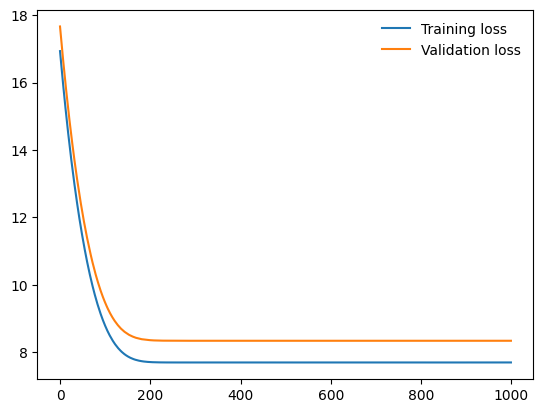

Train R^2 Score: -2.4081868500894057
Valid R^2 Score: -2.3296877593220726
Test R^2 Score: -2.622047751816691


In [ ]:
import copy
from sklearn.metrics import r2_score

# モデルの複製
model_gap = copy.deepcopy(model_dipole)

# 最初の層の重みを固定（学習させない）
for param in list(model_gap.parameters())[:-1]:
    param.requires_grad = False

# パラメータ更新対象として、最終層のパラメータだけをoptimizerに渡す
optimizer_gap = Adam([list(model_gap.parameters())[-1]], lr=0.001)

criterion_gap = nn.MSELoss()

train_data_gap = MoleculeDataset(descriptor_df.loc[train_data.index, :], train_data['HOMO-LUMO gap'])
valid_data_gap = MoleculeDataset(descriptor_df.loc[valid_data.index, :], valid_data['HOMO-LUMO gap'])
train_loader_gap = DataLoader(dataset=train_data_gap, batch_size=32, shuffle=True)
valid_loader_gap = DataLoader(dataset=valid_data_gap, batch_size=32)

train_losses_gap = []
valid_losses_gap = []
for epoch in range(1000):
    model_gap.train()
    running_loss = 0
    for batch in train_loader_gap:
        descriptor, property = batch
        optimizer_gap.zero_grad()
        outputs = model_gap(descriptor)
        loss = criterion_gap(outputs[:,0], property)
        running_loss += loss.item()
        loss.backward()
        optimizer_gap.step()
    running_loss /= len(train_loader_gap)
    train_losses_gap.append(running_loss)

    model_gap.eval()
    running_loss = 0
    for batch in valid_loader_gap:
        descriptor, property = batch
        outputs = model_gap(descriptor)
        loss = criterion_gap(outputs[:,0], property)
        running_loss += loss.item()
    running_loss /= len(valid_loader_gap)
    valid_losses_gap.append(running_loss)

plt.plot(train_losses_gap, label='Training loss')
plt.plot(valid_losses_gap, label='Validation loss')
plt.legend(frameon=False)
plt.show()

y_train_true = train_data['HOMO-LUMO gap'].values
y_valid_true = valid_data['HOMO-LUMO gap'].values
y_test_true = test_data['HOMO-LUMO gap'].values

y_train_pred = model_gap(torch.Tensor(descriptor_df.loc[train_data.index].values)).detach().numpy()[:,0]
y_valid_pred = model_gap(torch.Tensor(descriptor_df.loc[valid_data.index].values)).detach().numpy()[:,0]
y_test_pred = model_gap(torch.Tensor(descriptor_df.loc[test_data.index].values)).detach().numpy()[:,0]

print("Train R^2 Score:", r2_score(y_train_true, y_train_pred))
print("Valid R^2 Score:", r2_score(y_valid_true, y_valid_pred))
print("Test R^2 Score:", r2_score(y_test_true, y_test_pred))

## **化学データを用いた機械学習モデルの構築と転移学習のまとめ**

本プロジェクトでは、**化学的記述子（descriptor）を用いた機械学習モデルを構築し、異なる化学的性質の予測に転移学習（Transfer Learning）を適用** しました。以下に、各ステップの概要をまとめます。

---

### **1. データの準備**
- 化学データセット (`property_df`, `descriptor_df`) を用意。
- **1000個の化合物をランダムに選択し、訓練・検証データとして使用**。
- **残りの化合物をテストデータとして保持**。

```python
known_subset = property_df.sample(n=1000, random_state=42)
test_data = property_df.drop(known_subset.index)
train_data, valid_data = train_test_split(known_subset, test_size=0.2, random_state=42)
```

---

### **2. ニューラルネットワークモデルの構築**
- PyTorch の `nn.Module` を使用して**全結合（Fully Connected, FC）層を持つ回帰モデル** を構築。
- **入力層 → 512ノード → 256ノード → 128ノード → 出力層（1ノード）** の4層構造。
- 活性化関数に ReLU を使用。

```python
class Regressor(nn.Module):
    def __init__(self):
        super(Regressor, self).__init__()
        self.fc1 = nn.Linear(descriptor_df.shape[1], 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
```

---

### **3. Dipole Moment の回帰モデルの学習**
- `Regressor` を `Dipole moment` の予測モデルとして学習。
- **Adamオプティマイザ（学習率 0.001）**、**MSE（平均二乗誤差）** を損失関数として使用。
- 記述子 (`descriptor_df`) を入力し、Dipole moment を予測。

```python
model_dipole = Regressor()
optimizer_dipole = Adam(model_dipole.parameters(), lr=0.001)
criterion_dipole = nn.MSELoss()

trainval_data_dipole = MoleculeDataset(descriptor_df, property_df['Dipole moment'])
trainval_loader_dipole = DataLoader(dataset=trainval_data_dipole, batch_size=32, shuffle=True)

for epoch in range(100):
    model_dipole.train()
    for batch in trainval_loader_dipole:
        descriptor, property = batch
        optimizer_dipole.zero_grad()
        outputs = model_dipole(descriptor)
        loss = criterion_dipole(outputs[:,0], property)
        loss.backward()
        optimizer_dipole.step()
```

---

### **4. HOMO-LUMO gap 予測への転移学習**
- **学習済みの `model_dipole` をコピー** し、HOMO-LUMO gap 予測用モデル (`model_gap`) として再利用。
- **最終層のみ学習可能にし、それ以外の層の重みは固定**（転移学習）。
- **既存の Dipole moment モデルの特徴抽出能力を活かして、新しいタスクを効率的に学習**。

```python
import copy
model_gap = copy.deepcopy(model_dipole)

# 最終層以外のパラメータを固定
for param in list(model_gap.parameters())[:-1]:
    param.requires_grad = False

# 最終層のみ学習対象
optimizer_gap = Adam([list(model_gap.parameters())[-1]], lr=0.001)
criterion_gap = nn.MSELoss()
```

---

### **5. HOMO-LUMO gap 予測モデルの学習**
- 訓練データ (`train_loader_gap`)、検証データ (`valid_loader_gap`) で学習・評価を行う。
- 1000エポック学習し、**学習損失と検証損失の推移をプロット**。

```python
train_losses_gap = []
valid_losses_gap = []
for epoch in range(1000):
    model_gap.train()
    running_loss = 0
    for batch in train_loader_gap:
        descriptor, property = batch
        optimizer_gap.zero_grad()
        outputs = model_gap(descriptor)
        loss = criterion_gap(outputs[:,0], property)
        loss.backward()
        optimizer_gap.step()
    train_losses_gap.append(running_loss / len(train_loader_gap))

    model_gap.eval()
    running_loss = 0
    for batch in valid_loader_gap:
        descriptor, property = batch
        outputs = model_gap(descriptor)
        loss = criterion_gap(outputs[:,0], property)
    valid_losses_gap.append(running_loss / len(valid_loader_gap))

plt.plot(train_losses_gap, label='Training loss')
plt.plot(valid_losses_gap, label='Validation loss')
plt.legend(frameon=False)
plt.show()
```

---

### **6. モデルの評価**
- **決定係数 \( R^2 \) を算出** し、学習・検証・テストデータでの予測精度を評価。

```python
y_train_true = train_data['HOMO-LUMO gap'].values
y_valid_true = valid_data['HOMO-LUMO gap'].values
y_test_true = test_data['HOMO-LUMO gap'].values

y_train_pred = model_gap(torch.Tensor(descriptor_df.loc[train_data.index].values)).detach().numpy()[:,0]
y_valid_pred = model_gap(torch.Tensor(descriptor_df.loc[valid_data.index].values)).detach().numpy()[:,0]
y_test_pred = model_gap(torch.Tensor(descriptor_df.loc[test_data.index].values)).detach().numpy()[:,0]

print("Train R^2 Score:", r2_score(y_train_true, y_train_pred))
print("Valid R^2 Score:", r2_score(y_valid_true, y_valid_pred))
print("Test R^2 Score:", r2_score(y_test_true, y_test_pred))
```
- \( R^2 \) が 1 に近いほど良いモデル。
- **訓練データでの \( R^2 \) が高すぎ、検証データで極端に低い場合は過学習の可能性**。

---

## **まとめ**
### **1. Dipole moment の回帰モデルを構築**
- PyTorch を用いた全結合ネットワーク (`Regressor`) を作成。
- 化学記述子を入力し、Dipole moment を予測。

### **2. HOMO-LUMO gap 予測モデルを転移学習**
- `model_dipole` の構造を流用し、新しいタスク（HOMO-LUMO gap 予測）に適用。
- **最終層のみ学習し、それ以外の重みは固定**。

### **3. 学習・評価**
- **学習損失・検証損失の可視化** により、収束の確認・過学習の検出。
- **決定係数 \( R^2 \) により、予測性能を評価**。

---

## **今後の展開**
- **他の化学特性（溶解度、密度、誘電率など）の予測** に転移学習を応用。
- **ニューラルネットワークの構造やハイパーパラメータ（層の数、ノード数、活性化関数など）を最適化** し、モデルの精度向上。
- **説明可能な AI（XAI）技術を導入し、化学的な洞察を深める**。

---

このアプローチは、**化学データの有効活用、学習の効率化、予測精度の向上** に貢献できます！